# Generalized Entaglement Purification Protocol functions 

### Generalized T-CNOT Stim (Sampling)

In [1]:
import stim

def tcnot(circuit: stim.Circuit):
    c = circuit.copy()

    n1_memory_a = [0, 1, 2, 3, 4, 5, 6]
    n1_ancilla_a = [7, 8, 9, 10, 11, 12, 13]
    n2_ancilla_a = [14, 15, 16, 17, 18, 19, 20]
    n2_memory_a = [21, 22, 23, 24, 25, 26, 27]
    n1_memory_b = [28, 29, 30, 31, 32, 33, 34]
    n1_ancilla_b = [35, 36, 37, 38, 39, 40, 41]
    n2_ancilla_b = [42, 43, 44, 45, 46, 47, 48]
    n2_memory_b = [49, 50, 51, 52, 53, 54, 55]

    block_length = 7

    for _ in range(block_length):
        c.append('H', n1_memory_a[_])  
        c.append("H", n1_ancilla_a[_])
        c.append("CNOT", [n1_ancilla_a[_], n2_ancilla_a[_]])
        c.append('CNOT', [n1_memory_a[_], n1_ancilla_a[_]])
        c.append('CNOT', [n2_ancilla_a[_], n2_memory_a[_]])
        c.append('M', [n1_ancilla_a[_]])
        c.append('CX', [stim.target_rec(-1), stim.GateTarget(n2_memory_a[_])])
        c.append("H", [n2_ancilla_a[_]])
        c.append('M', [n2_ancilla_a[_]])
        c.append('CZ', [stim.target_rec(-1), stim.GateTarget(n1_memory_a[_])])
    
    for _ in range(block_length):
        c.append('H', n1_memory_b[_])  
        c.append("H", n1_ancilla_b[_])
        c.append("CNOT", [n1_ancilla_b[_], n2_ancilla_b[_]])
        c.append('CNOT', [n1_memory_b[_], n1_ancilla_b[_]])
        c.append('CNOT', [n2_ancilla_b[_], n2_memory_b[_]])
        c.append('M', [n1_ancilla_b[_]])
        c.append('CX', [stim.target_rec(-1), stim.GateTarget(n2_memory_b[_])])
        c.append("H", [n2_ancilla_b[_]])
        c.append('M', [n2_ancilla_b[_]])
        c.append('CZ', [stim.target_rec(-1), stim.GateTarget(n1_memory_b[_])])
        
    return c


### Generalized Entanglement Swapping Stim (Sampling)

In [432]:
import stim 

def entaglement_swapping(circuit: stim.Circuit) -> stim.Circuit:
    """
    Constructs the entanglement swapping circuit on qubits 0-3:
    - Prepare Bell pairs on (0,1) and (2,3)
    - Bell measurement on qubits 1 & 2
    - Pauli-frame corrections on qubit 3
    """

    c = circuit.copy()
    # Prepare Bell pairs
    c.append("H", [0])
    c.append("CNOT", [0, 1])
    c.append("H", [2])
    c.append("CNOT", [2, 3])
    # Bell measurement
    c.append("CNOT", [1, 2])
    c.append("H", [1])
    c.append("M", [1])  # m_X
    c.append("M", [2])  # m_Z
    # Pauli-frame corrections on qubit 3

    c.append('CX', [stim.target_rec(-1), stim.GateTarget(3)])
    c.append('CZ', [stim.target_rec(-2), stim.GateTarget(3)])
    return c

## Errorless (No QEC) T-CNOT Qiskit (Analytical)

Reduced density matrix on qubits [s1,s2]:
[[0.5+0.j 0. +0.j 0. +0.j 0.5+0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0.5+0.j 0. +0.j 0. +0.j 0.5+0.j]]


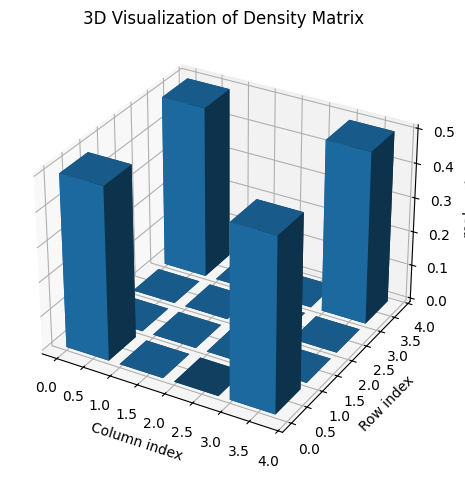

In [16]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, DensityMatrix, partial_trace

qc = QuantumCircuit(4)
s1, s2, c1, c2 = 0, 1, 2, 3

qc.h(s1)
qc.h(c1)
qc.cx(c1, c2)
qc.cx(s1, c1)
qc.cx(c2, s2)
qc.cx(c1, s2)
qc.h(c2)
qc.cz(c2, s1)

sv = Statevector.from_instruction(qc)
rho_full = DensityMatrix(sv)

rho_0_3 = partial_trace(rho_full, [c1, c2])

print("Reduced density matrix on qubits [s1,s2]:")
print(rho_0_3.data)
plot_density_matrix_3d(rho_0_3.data, kind='real')

## QEC TCNOT Stim (sampling)

In [ ]:
import stim

def bools_to_int(b0, b1, b2):
    """
    Convert three Boolean-ish values into a 3-bit integer.
    True/“true” → 1, False/“false” → 0.
    
    Examples:
        bools_to_int(True, False, True)   → 5   (binary 101)
        bools_to_int("false","TRUE",0)    → 4   (binary 100)
    """
    bits = []
    for b in (b0, b1, b2):
        vb = str(b).lower()
        bits.append('1' if vb in ('true', '1') else '0')
    binary_str = ''.join(bits)
    return int(binary_str, 2)

def logical_plus_encoding():
    c = stim.Circuit()

    data_q = 12
    psi1, psi2, psi3, psi4, psi5, psi6 = 11, 10, 9, 8, 7, 6
    a1, a2, a3, a4, a5, a6  =  5,  4,  3,  2,  1,  0

    # --- Encoding -----------------------------------------------------------
    c.append("H", [psi4, psi5, psi6])

    c.append("CX", [data_q, psi1])
    c.append("CX", [data_q, psi2])

    c.append("CX", [psi6, psi3])
    c.append("CX", [psi6, psi1])
    c.append("CX", [psi6, data_q])

    c.append("CX", [psi5, psi3])
    c.append("CX", [psi5, psi2])
    c.append("CX", [psi5, data_q])

    c.append("CX", [psi4, psi3])
    c.append("CX", [psi4, psi2])
    c.append("CX", [psi4, psi1])

    # --- Noise -------------------------------------------------------------
    # c.append("X", [psi6])
    c.append("Z", [psi3])

    # --- Stabilizer Measurements ------------------------------------------
    # Bit-flip syndrome
    c.append("CX", [data_q, a1])
    c.append("CX", [psi2, a1])
    c.append("CX", [psi4, a1])
    c.append("CX", [psi6, a1])

    c.append("CX", [psi1, a2])
    c.append("CX", [psi2, a2])
    c.append("CX", [psi5, a2])
    c.append("CX", [psi6, a2])

    c.append("CX", [psi3, a3])
    c.append("CX", [psi4, a3])
    c.append("CX", [psi5, a3])
    c.append("CX", [psi6, a3])

    # Phase-flip syndrome
    c.append("H", [a4, a5, a6])
 
    c.append("CX", [a4, data_q])
    c.append("CX", [a4, psi2])
    c.append("CX", [a4, psi4])
    c.append("CX", [a4, psi6])

    c.append("CX", [a5, psi1])
    c.append("CX", [a5, psi2])
    c.append("CX", [a5, psi5])
    c.append("CX", [a5, psi6])

    c.append("CX", [a6, psi3])
    c.append("CX", [a6, psi4])
    c.append("CX", [a6, psi5])
    c.append("CX", [a6, psi6])

    c.append("H", [a4, a5, a6])

    c.append("M", [a3, a2, a1])   # Bit Measurements
    c.append("M", [a6, a5, a4])   # Phase Measurements

    # phase0 = c.measure(a6)
    # phase1 = c.measure(a5)
    # phase2 = c.measure(a4)

    # phase_index = 13 - bools_to_int(phase0, phase1, phase2)
    # if phase_index != 13:
    #     c.z(phase_index)

    # bit0 = c.measure(a3)
    # bit1 = c.measure(a2)
    # bit2 = c.measure(a1)

    # bit_index = 13 - bools_to_int(bit0, bit1, bit2)
    # if bit_index != 13:
    #     c.x(bit_index)
    
    # --- Decoding -----------------------------------------------------------
    c.append("CX", [psi4, psi1])
    c.append("CX", [psi4, psi2])
    c.append("CX", [psi4, psi3])

    c.append("CX", [psi5, data_q])
    c.append("CX", [psi5, psi2])
    c.append("CX", [psi5, psi3])

    c.append("CX", [psi6, data_q])
    c.append("CX", [psi6, psi1])
    c.append("CX", [psi6, psi3])

    c.append("CX", [data_q, psi2])
    c.append("CX", [data_q, psi1])

    c.append("H", [psi4, psi5, psi6])

    return [c]

def logical_zero_encoding():
    c = stim.Circuit()

    data_q = 12
    psi1, psi2, psi3, psi4, psi5, psi6 = 11, 10, 9, 8, 7, 6
    a1, a2, a3, a4, a5, a6  =  5,  4,  3,  2,  1,  0

    # --- Encoding -----------------------------------------------------------
    c.append("H", [psi4, psi5, psi6])

    c.append("CX", [data_q, psi1])
    c.append("CX", [data_q, psi2])

    c.append("CX", [psi6, psi3])
    c.append("CX", [psi6, psi1])
    c.append("CX", [psi6, data_q])

    c.append("CX", [psi5, psi3])
    c.append("CX", [psi5, psi2])
    c.append("CX", [psi5, data_q])

    c.append("CX", [psi4, psi3])
    c.append("CX", [psi4, psi2])
    c.append("CX", [psi4, psi1])

    # --- Noise -------------------------------------------------------------
    # c.append("X", [psi6])
    c.append("Z", [psi3])

    # --- Stabilizer Measurements ------------------------------------------
    # Bit-flip syndrome
    c.append("CX", [data_q, a1])
    c.append("CX", [psi2, a1])
    c.append("CX", [psi4, a1])
    c.append("CX", [psi6, a1])

    c.append("CX", [psi1, a2])
    c.append("CX", [psi2, a2])
    c.append("CX", [psi5, a2])
    c.append("CX", [psi6, a2])

    c.append("CX", [psi3, a3])
    c.append("CX", [psi4, a3])
    c.append("CX", [psi5, a3])
    c.append("CX", [psi6, a3])

    # Phase-flip syndrome
    c.append("H", [a4, a5, a6])
 
    c.append("CX", [a4, data_q])
    c.append("CX", [a4, psi2])
    c.append("CX", [a4, psi4])
    c.append("CX", [a4, psi6])

    c.append("CX", [a5, psi1])
    c.append("CX", [a5, psi2])
    c.append("CX", [a5, psi5])
    c.append("CX", [a5, psi6])

    c.append("CX", [a6, psi3])
    c.append("CX", [a6, psi4])
    c.append("CX", [a6, psi5])
    c.append("CX", [a6, psi6])

    c.append("H", [a4, a5, a6])

    c.append("M", [a3, a2, a1])   # Bit Measurements
    c.append("M", [a6, a5, a4])   # Phase Measurements

    # phase0 = c.measure(a6)
    # phase1 = c.measure(a5)
    # phase2 = c.measure(a4)

    # phase_index = 13 - bools_to_int(phase0, phase1, phase2)
    # if phase_index != 13:
    #     c.z(phase_index)

    # bit0 = c.measure(a3)
    # bit1 = c.measure(a2)
    # bit2 = c.measure(a1)

    # bit_index = 13 - bools_to_int(bit0, bit1, bit2)
    # if bit_index != 13:
    #     c.x(bit_index)
    
    # --- Decoding -----------------------------------------------------------
    c.append("CX", [psi4, psi1])
    c.append("CX", [psi4, psi2])
    c.append("CX", [psi4, psi3])

    c.append("CX", [psi5, data_q])
    c.append("CX", [psi5, psi2])
    c.append("CX", [psi5, psi3])

    c.append("CX", [psi6, data_q])
    c.append("CX", [psi6, psi1])
    c.append("CX", [psi6, psi3])

    c.append("CX", [data_q, psi2])
    c.append("CX", [data_q, psi1])

    c.append("H", [psi4, psi5, psi6])

    return [c]

# 3 qubit code

### Tomography Function

In [341]:
import itertools
import numpy as np
import stim

def tomography(circuit: stim.Circuit,
    qubits: tuple[int, int], shots: int = 10000
) -> np.ndarray:
    """
    Reconstruct the reduced density matrix on the specified pair of qubits
    after entanglement swapping by performing Pauli tomography.

    Args:
        qubits: Tuple of two qubit indices (e.g., (0, 3)).
        shots: Number of samples per Pauli setting.

    Returns:
        rho: 4×4 numpy array representing the density matrix on those qubits.
    """
    q0, q1 = qubits
    base = circuit.copy()
    paulis = ['I', 'X', 'Y', 'Z']
    exp_vals: dict[tuple[str, str], float] = {}

    # Estimate expectation for each Pauli pair
    for p0 in paulis:
        for p1 in paulis:
            if p0 == 'I' and p1 == 'I':
                exp_vals[(p0, p1)] = 1.0
                continue

            c = base.copy()
            tom_count = 0

            # Rotate & measure on q0 if needed
            if p0 != 'I':
                if p0 == 'X':
                    c.append("H", [q0])
                elif p0 == 'Y':
                    c.append("S_DAG", [q0])
                    c.append("H", [q0])
                c.append("M", [q0])
                tom_count += 1

            # Rotate & measure on q1 if needed
            if p1 != 'I':
                if p1 == 'X':
                    c.append("H", [q1])
                elif p1 == 'Y':
                    c.append("S_DAG", [q1])
                    c.append("H", [q1])
                c.append("M", [q1])
                tom_count += 1

            # Sample the circuit
            sampler = c.compile_sampler()
            bits = sampler.sample(shots)  # shape (shots, 2 + tom_count)

            # Extract tomography bits (always start at index 2)
            if tom_count == 2:
                m0 = bits[:, 2]
                m1 = bits[:, 3]
                exp_vals[(p0, p1)] = np.mean((1 - 2*m0) * (1 - 2*m1))
            elif p0 != 'I':
                m0 = bits[:, 2]
                exp_vals[(p0, p1)] = np.mean(1 - 2*m0)
            else:
                m1 = bits[:, 2]
                exp_vals[(p0, p1)] = np.mean(1 - 2*m1)

    # Reconstruct density matrix via Pauli expansion
    sigma = {
        'I': np.eye(2, dtype=complex),
        'X': np.array([[0, 1], [1, 0]], dtype=complex),
        'Y': np.array([[0, -1j], [1j, 0]], dtype=complex),
        'Z': np.array([[1, 0], [0, -1]], dtype=complex),
    }
    rho = sum(
        exp_vals[(p0, p1)] * np.kron(sigma[p0], sigma[p1])
        for p0 in paulis for p1 in paulis
    ) / 4

    return rho

def tomography_on_circuit(circuit: stim.Circuit, qubits: tuple[int, int], shots: int = 10000):
    """
    Perform 2-qubit Pauli tomography on the specified pair of qubits in the given circuit.
    Returns the reconstructed 4x4 density matrix.
    
    Args:
        circuit: A stim.Circuit without demolition measurements.
        qubits: A tuple (q0, q1) of qubit indices to reconstruct.
        shots: Number of samples per Pauli setting.
    """
    paulis = ['I', 'X', 'Y', 'Z']
    exp_vals = {}

    # For each Pauli basis combination
    for p0 in paulis:
        for p1 in paulis:
            # The identity-identity expectation is always 1
            if p0 == 'I' and p1 == 'I':
                exp_vals[(p0, p1)] = 1.0
                continue

            # Copy the base circuit
            c = circuit.copy()
            meas_qubits = []

            # Apply basis change and measurement for first qubit
            if p0 != 'I':
                if p0 == 'X':
                    c.append('H', [qubits[0]])
                elif p0 == 'Y':
                    c.append('S_DAG', [qubits[0]])
                    c.append('H', [qubits[0]])
                c.append('M', [qubits[0]])
                meas_qubits.append(qubits[0])

            # Apply basis change and measurement for second qubit
            if p1 != 'I':
                if p1 == 'X':
                    c.append('H', [qubits[1]])
                elif p1 == 'Y':
                    c.append('S_DAG', [qubits[1]])
                    c.append('H', [qubits[1]])
                c.append('M', [qubits[1]])
                meas_qubits.append(qubits[1])

            # Sample the circuit
            sampler = c.compile_sampler()
            bits = sampler.sample(shots)  # shape (shots, len(meas_qubits))

            # Compute expectation value
            if len(meas_qubits) == 2:
                m0 = bits[:, 0]
                m1 = bits[:, 1]
                exp_vals[(p0, p1)] = np.mean((1 - 2*m0) * (1 - 2*m1))
            else:
                m = bits[:, 0]
                exp_vals[(p0, p1)] = np.mean(1 - 2*m)

    # Reconstruct density matrix from Pauli expectations
    sigma = {
        'I': np.eye(2, dtype=complex),
        'X': np.array([[0,1],[1,0]], dtype=complex),
        'Y': np.array([[0,-1j],[1j,0]], dtype=complex),
        'Z': np.array([[1,0],[0,-1]], dtype=complex),
    }
    rho = sum(
        exp_vals[(p0, p1)] * np.kron(sigma[p0], sigma[p1])
        for p0 in paulis for p1 in paulis
    ) / 4

    return rho

def tomography_dm(
    circuit: stim.Circuit,
    qubits: list[int] | tuple[int, ...],
    shots: int = 10_000,
    use_direct_pauli_meas: bool = True,
) -> np.ndarray:
    """
    Reconstruct the reduced density matrix on `qubits` of a Stim circuit using
    full Pauli tomography and linear inversion.

    ρ = (1 / 2^k) * Σ_{P∈{I,X,Y,Z}^k} ⟨P⟩ P

    Args:
        circuit: The base stim.Circuit (may contain any gates/measurements).
        qubits:  Iterable of qubit indices to reconstruct (length = k).
        shots:   Number of samples per Pauli setting.
        use_direct_pauli_meas:
                 True  -> use MX/MY/M (Z) instructions (cleaner, recommended).
                 False -> rotate with H/S_DAG then use M (Z) for all Pauli bases.

    Returns:
        rho: A (2**k × 2**k) complex numpy array (density matrix on `qubits`).
    """
    # ---- Pauli helpers ----
    PAULIS = ("I", "X", "Y", "Z")
    SIGMA = {
        "I": np.eye(2, dtype=complex),
        "X": np.array([[0, 1], [1, 0]], dtype=complex),
        "Y": np.array([[0, -1j], [1j, 0]], dtype=complex),
        "Z": np.array([[1, 0], [0, -1]], dtype=complex),
    }

    def kron_all(mats):
        out = mats[0]
        for m in mats[1:]:
            out = np.kron(out, m)
        return out

    qubits = tuple(qubits)
    k = len(qubits)
    base_meas = circuit.num_measurements  # how many M/MX/MY/MZ are already there
    exp_vals = {}

    # Iterate over every Pauli string on these k qubits
    for setting in itertools.product(PAULIS, repeat=k):
        # identity on all => expectation is 1
        if all(p == "I" for p in setting):
            exp_vals[setting] = 1.0
            continue

        # Clone base circuit and append tomography operations
        c = circuit.copy()
        measured_count = 0

        if use_direct_pauli_meas:
            # Direct Pauli demolition measurements
            for q, p in zip(qubits, setting):
                if p == "I":
                    continue
                gate = {"X": "MX", "Y": "MY", "Z": "M"}[p]
                c.append(gate, [q])
                measured_count += 1
        else:
            # Basis-rotate then M (Z)
            for q, p in zip(qubits, setting):
                if p == "I":
                    continue
                if p == "X":
                    c.append("H", [q])
                elif p == "Y":
                    c.append("S_DAG", [q])
                    c.append("H", [q])
                # Z: do nothing
                c.append("M", [q])
                measured_count += 1

        # Sample
        sampler = c.compile_sampler()
        bits = sampler.sample(shots=shots)

        # Extract the tomography bits we just added (they appear at the end)
        tomo_bits = bits[:, base_meas: base_meas + measured_count]
        eig = 1 - 2 * tomo_bits  # 0->+1, 1->-1

        # Expectation is product of eigenvalues across all measured qubits
        exp_vals[setting] = float(np.mean(np.prod(eig, axis=1))) if measured_count > 1 else float(np.mean(eig))

    # Linear inversion reconstruction
    dim = 2 ** k
    rho = np.zeros((dim, dim), dtype=complex)
    for setting, val in exp_vals.items():
        mats = [SIGMA[p] for p in setting]
        rho += val * kron_all(mats)
    rho /= dim

    return rho


### Exact Density Matrix extractor

In [408]:
from typing import Sequence
import stim
import numpy as np
from qutip import Qobj, ptrace

def get_exact_density_matrix(
    circuit: stim.Circuit,
    keep_qubits: Sequence[int]
) -> np.ndarray:
    """
    Given a Clifford circuit and a list of qubits to keep, return
    the exact reduced density matrix on those qubits.

    Args:
        circuit: a stim.Circuit acting on N qubits.
        keep_qubits: sorted list of distinct qubit indices in [0, N).
    Returns:
        (2^k × 2^k) NumPy array for k = len(keep_qubits).
    """
    # --- 1) Validate inputs ---
    n = circuit.num_qubits
    if not keep_qubits:
        raise ValueError("keep_qubits must be non‑empty")
    if any((q < 0 or q >= n) for q in keep_qubits):
        raise IndexError(f"keep_qubits entries must be in [0, {n-1}]")
    if len(set(keep_qubits)) != len(keep_qubits):
        raise ValueError("keep_qubits contains duplicates")

    # --- 2) Run the circuit in the tableau simulator ---
    sim = stim.TableauSimulator()
    sim.do(circuit)

    # --- 3) Extract the statevector ---
    try:
        # Stim ≥1.9: direct access to the 2^n amplitudes
        psi = np.array(sim.state_vector(), dtype=complex)
    except AttributeError:
        # Fallback: build the sparse unitary via the same tableau
        U = circuit.to_sparse_unitary().toarray()
        psi0 = np.zeros((2**n,), dtype=complex)
        psi0[0] = 1.0
        psi = U.dot(psi0)

    # --- 4) Form the full density matrix ρ = |ψ><ψ| ---
    rho_full = np.outer(psi, psi.conj())

    # --- 5) Partial trace via QuTiP ---
    dims = [[2]*n, [2]*n]
    qobj = Qobj(rho_full, dims=dims)
    rho_reduced = ptrace(qobj, list(keep_qubits))

    return np.array(rho_reduced.full())


# ===== Example usage =====
if __name__ == "__main__":
    # Build a simple 4‑qubit circuit
    circ = stim.Circuit()
    circ.append("H", [0])
    circ.append("CNOT", [0, 3])
    circ.append("X", [2])
    circ.append("CNOT", [2, 1])

    # Get the reduced density matrix on qubits 0 and 3
    rho_0_3 = get_exact_density_matrix(circ, keep_qubits=[0, 3])
    print("ρ_{0,3} =\n", rho_0_3)


ρ_{0,3} =
 [[0.5+0.j 0. +0.j 0. +0.j 0.5+0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0.5+0.j 0. +0.j 0. +0.j 0.5+0.j]]


In [8]:

import stim
import numpy as np

def state_vector(circuit: stim.Circuit) -> np.ndarray:
    """
    Compute the exact stabilizer state vector for the given Stim circuit.

    Args:
      circuit: A stim.Circuit with only Clifford gates (no measurements).

    Returns:
      A 1D complex numpy array of length 2**num_qubits.
    """
    sim = stim.TableauSimulator()
    sim.do(circuit)
    vec = sim.state_vector()
    return np.asarray(vec, dtype=complex)

# %% Cell 2: build & test
# 1) Build a simple Bell-pair circuit
c = stim.Circuit()
c.append("H", [0])
c.append('S_DAG', [0])
c.append("CNOT", [0, 1])

# 2) Compute its exact statevector
psi = state_vector(c)
print("State vector:", psi)

# 3) Verify against the ideal (|00>+|11>)/√2
ideal = np.array([1, 0, 0, 1], dtype=complex)/np.sqrt(2)
print("Overlap 〈ideal|ψ〉 =", np.vdot(ideal, psi))


State vector: [0.70710677+0.j         0.        +0.j         0.        +0.j
 0.        -0.70710677j]
Overlap 〈ideal|ψ〉 = (0.49999999144286444-0.49999999144286444j)


### 3 qubit repetition code using stabalizer formalism (1 node)

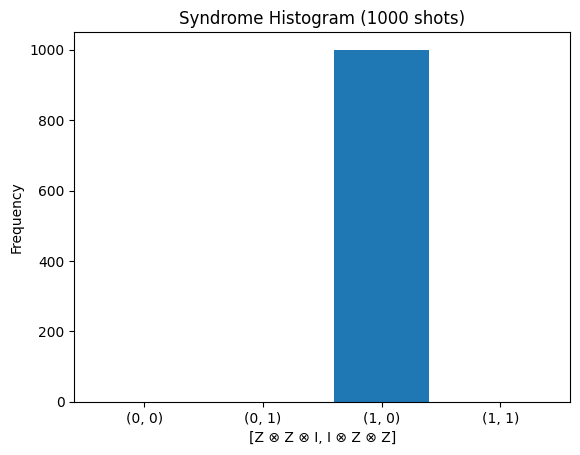

In [382]:
import stim
from collections import Counter
import matplotlib.pyplot as plt
import random

def three_qubit_repetition_code(p_error=0.1):
    circuit = stim.Circuit()

    circuit.append("", 0)
    # circuit.append("CNOT", [0, 1])
    # circuit.append("CNOT", [0, 2])

    circuit.append("H", 0)
    circuit.append("CNOT", [0, 1])
    circuit.append("CNOT", [0, 2])

    circuit.append("X_ERROR", [0], [p_error])
    # 3) Measure Z0Z1 parity on ancilla 3
    circuit.append("CNOT", [0, 3])
    circuit.append("CNOT", [1, 3])
    circuit.append("M", 3)
    # circuit.append("DETECTOR", [stim.target_rec(-1)])

    # 4) Measure Z1Z2 parity on ancilla 4
    circuit.append("CNOT", [1, 4])
    circuit.append("CNOT", [2, 4])
    circuit.append("M", 4)
    # circuit.append("DETECTOR", [stim.target_rec(-1)])

    return circuit

# Build & sample
circuit = three_qubit_repetition_code(p_error=1)
sampler = circuit.compile_sampler()
shots = sampler.sample(shots=1000)   # e.g. 1000 shots

# Histogram
counts = Counter(tuple(s) for s in shots)
outcomes = [(0,0),(0,1),(1,0),(1,1)]
plt.bar([str(o) for o in outcomes], [counts[o] for o in outcomes])
plt.xlabel("[Z ⊗ Z ⊗ I, I ⊗ Z ⊗ Z]")
plt.ylabel("Frequency")
plt.title("Syndrome Histogram (1000 shots)")
plt.show()


### Convert state vector to density matrix traced

In [307]:
import numpy as np

def reduced_rho_0_3(psi):
    """
    Given a 4‑qubit state vector psi (length 16),
    trace out qubits 1 and 2 to get the density matrix
    on qubits 0 and 3.
    """
    # Full density matrix 16×16
    rho_full = np.outer(psi, psi.conj())
    
    # Reshape to 8‑index tensor: (q0,q1,q2,q3, q0',q1',q2',q3')
    rho_t = rho_full.reshape([2,2,2,2, 2,2,2,2])
    
    # Allocate reduced tensor: (q0, q3, q0', q3')
    rho_red_t = np.zeros((2,2,2,2), dtype=complex)
    
    # Sum over q1=q1' and q2=q2'
    for i0 in range(2):
        for i3 in range(2):
            for j0 in range(2):
                for j3 in range(2):
                    s = 0+0j
                    for i1 in range(2):
                        for i2 in range(2):
                            s += rho_t[i0, i1, i2, i3, 
                                       j0, i1, i2, j3]
                    rho_red_t[i0, i3, j0, j3] = s
    
    # Collapse into a 4×4 matrix in basis [00,01,10,11]
    return rho_red_t.reshape(4,4)

# Your state vector:
psi = np.array([ 0+0j, 0+0j, 0+0j, 0+0j, 0+0j, 0.707+0j, 0+0j, 0+0j, 0+0j, 0+0j, 0+0j, 0+0j, 0.707+0j, 0+0j, 0+0j, 0+0j ]
, dtype=complex)

rho_0_3 = reduced_rho_0_3(psi)

# Display it
np.set_printoptions(precision=3, suppress=True)
print("Reduced density matrix on qubits 0 & 3:")
print(rho_0_3)


Reduced density matrix on qubits 0 & 3:
[[0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0.5+0.j 0.5+0.j 0. +0.j]
 [0. +0.j 0.5+0.j 0.5+0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]]


### Qutip entaglment swapping

In [134]:
from qutip import tensor, basis, ket2dm, Qobj, ptrace
import numpy as np

def entanglement_swapping_qutip():
    """
    Simulate entanglement swapping on 4 qubits (0–3):
    • Prepare |Φ+> on (0,1) and (2,3).
    • Bell-measure qubits 1 & 2.
    • Apply the corresponding Pauli on qubit 3.
    • Return the reduced density matrix on qubits (0,3).
    """
    # 1) Define the four Bell states on 2 qubits
    phi_plus  = (tensor(basis(2,0), basis(2,0)) + tensor(basis(2,1), basis(2,1))).unit()
    phi_minus = (tensor(basis(2,0), basis(2,0)) - tensor(basis(2,1), basis(2,1))).unit()
    psi_plus  = (tensor(basis(2,0), basis(2,1)) + tensor(basis(2,1), basis(2,0))).unit()
    psi_minus = (tensor(basis(2,0), basis(2,1)) - tensor(basis(2,1), basis(2,0))).unit()

    # 2) Initial 4-qubit state |Φ+>₀₁ ⊗ |Φ+>₂₃
    psi_init = tensor(phi_plus, phi_plus)

    # 3) Pauli corrections for each Bell outcome
    pauli_I = Qobj(np.eye(2))
    pauli_X = Qobj([[0,1],[1,0]])
    pauli_Z = Qobj([[1,0],[0,-1]])
    outcomes = [
        (phi_plus,  pauli_I),
        (phi_minus, pauli_Z),
        (psi_plus,  pauli_X),
        (psi_minus, pauli_X * pauli_Z),
    ]

    # 4) Accumulate the post-measurement density matrix with correct dims
    dims = psi_init.dims[0]  # [2, 2, 2, 2]
    rho_final = Qobj(np.zeros((16, 16), dtype=complex), dims=[dims, dims])

    for bell_state, correction in outcomes:
        # Projector P onto that Bell state on qubits 1 & 2
        P = tensor(
            Qobj(np.eye(2)),      # qubit 0
            ket2dm(bell_state),   # qubits 1-2
            Qobj(np.eye(2)),      # qubit 3
        )

        # Probability of this outcome (complex -> float)
        p = float((psi_init.dag() * P * psi_init).real)

        # Post-measurement (unnormalized) ket & normalize
        psi_post = P * psi_init
        psi_norm = psi_post.unit()

        # Apply the correction on qubit 3
        corr_op = tensor(
            Qobj(np.eye(2)), Qobj(np.eye(2)),
            Qobj(np.eye(2)), correction
        )
        psi_corr = corr_op * psi_norm

        # Add weighted density matrix
        rho_final += p * ket2dm(psi_corr)

    # 5) Trace out qubits 1 & 2, keep (0,3)
    rho_0_3 = ptrace(rho_final, [0, 3])
    return rho_0_3

# Usage
rho_0_3 = entanglement_swapping_qutip()
print("Final 2-qubit density matrix on (0,3):")
print(rho_0_3)


Final 2-qubit density matrix on (0,3):
Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.5 0.  0.  0.5]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.5 0.  0.  0.5]]


### Stim entaglement Swapping (dm version)

In [259]:
import stim
import numpy as np

def ent_swap_reduced_density_q0q3():
    """
    Perform entanglement swapping on qubits 0-3 using Stim's TableauSimulator,
    then trace out qubits 1 and 2, returning the reduced 2-qubit density matrix on 0 and 3.
    """
    # 1) Build the entanglement swapping circuit
    c = stim.Circuit()
    # Prepare Bell pairs on (0,1) and (2,3)
    c.append("H", [0])
    c.append("CNOT", [0, 1])
    c.append("H", [2])
    c.append("CNOT", [2, 3])
    # Bell measurement on qubits 1 & 2
    c.append("CNOT", [1, 2])
    c.append("H",    [1])
    c.append("M",    [1])  # records into rec[-2]
    c.append("M",    [2])  # records into rec[-1]
    # Pauli-frame corrections on qubit 3
    # c.append("CX", [stim.target_rec(-2), 3])
    # c.append("CZ", [stim.target_rec(-1), 3])
    c.append('CX', [stim.target_rec(-1), stim.GateTarget(3)])
    c.append('CZ', [stim.target_rec(-2), stim.GateTarget(3)])

    # 2) Simulate with TableauSimulator
    sim = stim.TableauSimulator()
    sim.do_circuit(c)
    # Extract the pure state vector (length 16, big-endian)
    psi = sim.state_vector(endian="big")

    # 3) Form full 4-qubit density matrix
    rho_full = np.outer(psi, np.conj(psi))
    # Reshape into 8-index tensor: [i0,i1,i2,i3, j0,j1,j2,j3]
    rho_tensor = rho_full.reshape([2,2,2,2,2,2,2,2])

    # 4) Partial trace over qubits 1 and 2
    rho_0_3 = np.zeros((2,2,2,2), dtype=complex)
    for i0 in range(2):
        for i1 in range(2):
            for i2 in range(2):
                for i3 in range(2):
                    for j0 in range(2):
                        for j1 in range(2):
                            for j2 in range(2):
                                for j3 in range(2):
                                    if i1 == j1 and i2 == j2:
                                        rho_0_3[i0, i3, j0, j3] += rho_tensor[i0, i1, i2, i3,
                                                                             j0, j1, j2, j3]
    # 5) Reshape to 4x4 matrix for qubits (0,3)
    return rho_0_3.reshape((4, 4))

# Example usage
rho_0_3 = ent_swap_reduced_density_q0q3()
print("Reduced density matrix on qubits 0 & 3:")
print(rho_0_3)


Reduced density matrix on qubits 0 & 3:
[[0.5+0.j 0. +0.j 0. +0.j 0.5+0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0.5+0.j 0. +0.j 0. +0.j 0.5+0.j]]


### Stim entaglement swapping (sampling)

In [291]:
import stim
import numpy as np

def ent_swap_base_circuit() -> stim.Circuit:
    """
    Constructs the entanglement swapping circuit on qubits 0-3:
    - Prepare Bell pairs on (0,1) and (2,3)
    - Bell measurement on qubits 1 & 2
    - Pauli-frame corrections on qubit 3
    """
    c = stim.Circuit()
    # Prepare Bell pairs
    c.append("H", [0])
    c.append("CNOT", [0, 1])
    c.append("H", [2])
    c.append("CNOT", [2, 3])
    # Bell measurement
    c.append("CNOT", [1, 2])
    c.append("H", [1])
    c.append("M", [1])  # m_X
    c.append("M", [2])  # m_Z
    # Pauli-frame corrections on qubit 3

    c.append('CX', [stim.target_rec(-1), stim.GateTarget(3)])
    c.append('CZ', [stim.target_rec(-2), stim.GateTarget(3)])
    return c

def tomography_ent_swap_density(circuit: stim.Circuit, qubits: tuple[int, int], shots: int = 10000) -> np.ndarray:
    """
    Reconstruct the reduced density matrix on the specified pair of qubits
    after entanglement swapping by performing Pauli tomography.

    Args:
        qubits: Tuple of two qubit indices (e.g., (0, 3)).
        shots: Number of samples per Pauli setting.

    Returns:
        rho: 4×4 numpy array representing the density matrix on those qubits.
    """
    q0, q1 = qubits
    base = circuit.copy()
    paulis = ['I', 'X', 'Y', 'Z']
    exp_vals: dict[tuple[str, str], float] = {}

    # Estimate expectation for each Pauli pair
    for p0 in paulis:
        for p1 in paulis:
            if p0 == 'I' and p1 == 'I':
                exp_vals[(p0, p1)] = 1.0
                continue

            c = base.copy()
            tom_count = 0

            # Rotate & measure on q0 if needed
            if p0 != 'I':
                if p0 == 'X':
                    c.append("H", [q0])
                elif p0 == 'Y':
                    c.append("S_DAG", [q0])
                    c.append("H", [q0])
                c.append("M", [q0])
                tom_count += 1

            # Rotate & measure on q1 if needed
            if p1 != 'I':
                if p1 == 'X':
                    c.append("H", [q1])
                elif p1 == 'Y':
                    c.append("S_DAG", [q1])
                    c.append("H", [q1])
                c.append("M", [q1])
                tom_count += 1

            # Sample the circuit
            sampler = c.compile_sampler()
            bits = sampler.sample(shots)  # shape (shots, 2 + tom_count)

            # Extract tomography bits (always start at index 2)
            if tom_count == 2:
                m0 = bits[:, 2]
                m1 = bits[:, 3]
                exp_vals[(p0, p1)] = np.mean((1 - 2*m0) * (1 - 2*m1))
            elif p0 != 'I':
                m0 = bits[:, 2]
                exp_vals[(p0, p1)] = np.mean(1 - 2*m0)
            else:
                m1 = bits[:, 2]
                exp_vals[(p0, p1)] = np.mean(1 - 2*m1)

    # Reconstruct density matrix via Pauli expansion
    sigma = {
        'I': np.eye(2, dtype=complex),
        'X': np.array([[0, 1], [1, 0]], dtype=complex),
        'Y': np.array([[0, -1j], [1j, 0]], dtype=complex),
        'Z': np.array([[1, 0], [0, -1]], dtype=complex),
    }
    rho = sum(
        exp_vals[(p0, p1)] * np.kron(sigma[p0], sigma[p1])
        for p0 in paulis for p1 in paulis
    ) / 4

    return rho

# Example usage:
rho_0_3 = tomography_ent_swap_density(ent_swap_base_circuit(), (0, 3), shots=5000)
print("Reconstructed reduced density matrix:\n", rho_0_3)


Reconstructed reduced density matrix:
 [[ 0.503+0.j     0.004-0.001j  0.002+0.004j  0.5  +0.006j]
 [ 0.004+0.001j  0.003+0.j     0.   -0.004j -0.003-0.005j]
 [ 0.002-0.004j  0.   +0.004j -0.003+0.j     0.005+0.004j]
 [ 0.5  -0.006j -0.003+0.005j  0.005-0.004j  0.497+0.j   ]]


### Generalized entaglement swapping with tcnot Stim sampling

In [430]:
import stim



def stabalizer_3_qubit_repeater():
    c = stim.Circuit()
    n1_memory_a = [0,1,2]
    n1_ancilla_a = [3,4,5]
    n2_ancilla_a = [6,7,8]
    n2_memory_a = [9,10,11]

    # n1_memory_b = [12,13,14]
    # n1_ancilla_b = [15,16,17]
    # n2_ancilla_b = [18,19,20]
    # n2_memory_b = [21,22,23]

    block_length = 3

    for node in [n1_memory_a, n2_memory_a]:
        c.append("CNOT", [node[0], node[1]])
        c.append("CNOT", [node[0], node[2]])

    for _ in range(block_length):

        c.append('H', n1_memory_a[_])  
        c.append("H", n1_ancilla_a[_])
        c.append("CNOT", [n1_ancilla_a[_], n2_ancilla_a[_]])
        c.append('CNOT', [n1_memory_a[_], n1_ancilla_a[_]])
        c.append('CNOT', [n2_ancilla_a[_], n2_memory_a[_]])
        c.append('M', [n1_ancilla_a[_]])
        c.append('CX', [stim.target_rec(-1), stim.GateTarget(n2_memory_a[_])])
        c.append("H", [n2_ancilla_a[_]])
        c.append('M', [n2_ancilla_a[_]])
        c.append('CZ', [stim.target_rec(-1), stim.GateTarget(n1_memory_a[_])])
    
    # for _ in range(block_length):
    #     c.append('H', n1_memory_b[_])  
    #     c.append("H", n1_ancilla_b[_])
    #     c.append("CNOT", [n1_ancilla_b[_], n2_ancilla_b[_]])
    #     c.append('CNOT', [n1_memory_b[_], n1_ancilla_b[_]])
    #     c.append('CNOT', [n2_ancilla_b[_], n2_memory_b[_]])
    #     c.append('M', [n1_ancilla_b[_]])
    #     c.append('CX', [stim.target_rec(-1), stim.GateTarget(n2_memory_b[_])])
    #     c.append("H", [n2_ancilla_b[_]])
    #     c.append('M', [n2_ancilla_b[_]])
    #     c.append('CZ', [stim.target_rec(-1), stim.GateTarget(n1_memory_b[_])])

    for node in [n1_memory_a, n2_memory_a]:
        c.append("CNOT", [node[0], node[2]])
        c.append("CNOT", [node[0], node[1]])

    # for _ in range(block_length):
    #     c.append("CNOT", [n2_memory_a[_], n1_memory_b[_]])
    #     c.append("H", [n2_memory_a[_]])
    #     c.append("M", [n2_memory_a[_]])

    # for _ in range(block_length):
    #     c.append("CNOT", [n2_memory_a[_], n1_memory_b[_]])
    #     c.append("M", [n1_memory_b[_]])

    return c



# Example usage:
rho = tomography_dm(stabalizer_3_qubit_repeater(), [0,1,2,9,10,11], shots=5000)
# rho = get_exact_density_matrix(stabalizer_3_qubit_repeater(), [0,1,2,9,10,11])
print(rho)


[[ 0.124+0.j    -0.002-0.001j -0.001-0.002j ...  0.001-0.002j
  -0.002-0.002j  0.126-0.j   ]
 [-0.002+0.001j -0.   +0.j    -0.001-0.001j ...  0.001-0.002j
   0.001+0.002j  0.002+0.002j]
 [-0.001+0.002j -0.001+0.001j  0.   +0.j    ... -0.   -0.j
  -0.002-0.001j  0.002+0.j   ]
 ...
 [ 0.001+0.002j  0.001+0.002j -0.   +0.j    ... -0.001+0.j
  -0.   +0.j    -0.   -0.003j]
 [-0.002+0.002j  0.001-0.002j -0.002+0.001j ... -0.   -0.j
   0.   +0.j     0.001+0.j   ]
 [ 0.126+0.j     0.002-0.002j  0.002-0.j    ... -0.   +0.003j
   0.001-0.j     0.126+0.j   ]]


In [431]:
print(rho[0][0])
print(rho[0][63])
print(rho[63][0])
print(rho[63][63])

count = np.sum(np.abs(rho) > 0.1)
print(f"Number of elements with |value| > 0.1: {count}")

(0.12355000000000005+0j)
(0.12593125-0.0003812499999999999j)
(0.12593125+0.0003812499999999999j)
(0.1255+0j)
Number of elements with |value| > 0.1: 64


# 7 qubit code

In [149]:
def stabalizer_713():
    c = stim.Circuit()

    n1_memory_a = [0, 1, 2, 3, 4, 5, 6]
    n1_ancilla_a = [7, 8, 9, 10, 11, 12, 13]
    n2_ancilla_a = [14, 15, 16, 17, 18, 19, 20]
    n2_memory_a = [21, 22, 23, 24, 25, 26, 27]
    n1_memory_b = [28, 29, 30, 31, 32, 33, 34]
    n1_ancilla_b = [35, 36, 37, 38, 39, 40, 41]
    n2_ancilla_b = [42, 43, 44, 45, 46, 47, 48]
    n2_memory_b = [49, 50, 51, 52, 53, 54, 55]

    block_length = 7

    for _ in range(block_length):
        c.append('H', n1_memory_a[_])  
        c.append("H", n1_ancilla_a[_])
        c.append("CNOT", [n1_ancilla_a[_], n2_ancilla_a[_]])
        c.append('CNOT', [n1_memory_a[_], n1_ancilla_a[_]])
        c.append('CNOT', [n2_ancilla_a[_], n2_memory_a[_]])
        c.append('M', [n1_ancilla_a[_]])
        c.append('CX', [stim.target_rec(-1), stim.GateTarget(n2_memory_a[_])])
        c.append("H", [n2_ancilla_a[_]])
        c.append('M', [n2_ancilla_a[_]])
        c.append('CZ', [stim.target_rec(-1), stim.GateTarget(n1_memory_a[_])])
    
    for _ in range(block_length):
        c.append('H', n1_memory_b[_])  
        c.append("H", n1_ancilla_b[_])
        c.append("CNOT", [n1_ancilla_b[_], n2_ancilla_b[_]])
        c.append('CNOT', [n1_memory_b[_], n1_ancilla_b[_]])
        c.append('CNOT', [n2_ancilla_b[_], n2_memory_b[_]])
        c.append('M', [n1_ancilla_b[_]])
        c.append('CX', [stim.target_rec(-1), stim.GateTarget(n2_memory_b[_])])
        c.append("H", [n2_ancilla_b[_]])
        c.append('M', [n2_ancilla_b[_]])
        c.append('CZ', [stim.target_rec(-1), stim.GateTarget(n1_memory_b[_])])

    for _ in range(block_length):
        c.append("CNOT", [n2_memory_a[_], n1_memory_b[_]])
        c.append("H", [n2_memory_a[_]])
        c.append("M", [n2_memory_a[_]])

    for _ in range(block_length):
        c.append("CNOT", [n2_memory_a[_], n1_memory_b[_]])
        c.append("M", [n1_memory_b[_]])
        
    return c


In [154]:
c = stabalizer_713()
sampler = c.compile_sampler()
shot = sampler.sample(shots=1)[0]  

bits   = [int(b) for b in shot]
blockA = bits[:7]  # physical X‐readouts
blockB = bits[7:]  # physical Z‐readouts

tilde_X = 1 if sum(blockA) >= 4 else 0
tilde_Z = 1 if sum(blockB) >= 4 else 0

mapping = {
    (0, 0): "Φ⁺ (phi+)",
    (1, 0): "Φ⁻ (phi-)",
    (0, 1): "Ψ⁺ (psi+)",
    (1, 1): "Ψ⁻ (psi-)",
}

print(f"Physical X-block bits: {blockA}")
print(f"Physical Z-block bits: {blockB}")
print(f"Decoded (X\u0303, Z\u0303) = ({tilde_X}, {tilde_Z})")
print(f"Logical Bell state → {mapping[(tilde_X, tilde_Z)]}")

Physical X-block bits: [0, 1, 1, 0, 1, 1, 0]
Physical Z-block bits: [0, 0, 0, 0, 1, 1, 0]
Decoded (X̃, Z̃) = (1, 0)
Logical Bell state → Φ⁻ (phi-)
